In [ ]:
# datasets 
# Link gg drive: https://drive.google.com/drive/folders/1RfaNSEHIhW6JgjlujmpMCOqrrctz6VjX?usp=sharing

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [27]:
dataset_path = '/content/gdrive/MyDrive/Colab-Notebooks/Emotion'

In [28]:
image_size = (150,150)
TRAINING_DATA_DIR = str(dataset_path)
print(TRAINING_DATA_DIR)

# modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation

# validation data modify 
# valid_datagen = ImageDataGenerator(**kwargs_datagen)
# valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", 
#                                                     shuffle=True, target_size=image_size)

# train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",
                                                    shuffle=True,target_size=image_size)


/content/gdrive/MyDrive/Colab-Notebooks/Emotion
Found 88 images belonging to 4 classes.


In [29]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 4)
labels:  ['Ngacnhien' 'Buon' 'Gian' 'Hanh Phuc']
match class:  {'Ngacnhien': 0, 'buon': 1, 'gian': 2, 'hanh phuc': 3}


In [30]:
# Create layer model with CNN

model1=Sequential()
# BLock 1
model1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',
                  input_shape=(150,150,3))) 
model1.add(MaxPooling2D((2,2)))
#Block 2
model1.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(MaxPooling2D((2,2)))
#Block 3
model1.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same')) 
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(16,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(4,activation='softmax'))
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)     

In [31]:
#Training
# opt=SGD(learning_rate=0.01,momentum=0.9)
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
history1=model1.fit(train_generator,epochs=50,
                    steps_per_epoch=steps_per_epoch,verbose=1)

# Save model
model1.save('CNN_EmotionFaceDetect.h5')

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: 5.5072 - accuracy: 0.1591
Epoch 2/50
3/3 [==============================] - 0s 96ms/step - loss: 1.6754 - accuracy: 0.3182
Epoch 3/50
3/3 [==============================] - 0s 117ms/step - loss: 1.3848 - accuracy: 0.4545
Epoch 4/50
3/3 [==============================] - 0s 95ms/step - loss: 1.3842 - accuracy: 0.4545
Epoch 5/50
3/3 [==============================] - 0s 96ms/step - loss: 1.3835 - accuracy: 0.4545
Epoch 6/50
3/3 [==============================] - 0s 97ms/step - loss: 1.3652 - accuracy: 0.3864
Epoch 7/50
3/3 [==============================] - 0s 98ms/step - loss: 1.4020 - accuracy: 0.1818
Epoch 8/50
3/3 [==============================] - 0s 113ms/step - loss: 1.3664 - accuracy: 0.3068
Epoch 9/50
3/3 [==============================] - 0s 87ms/step - loss: 1.3537 - accuracy: 0.3068
Epoch 10/50
3/3 [==============================] - 0s 113ms/step - loss: 1.3243 - accuracy: 0.1818
Epoch 11/50
3/3 [===========

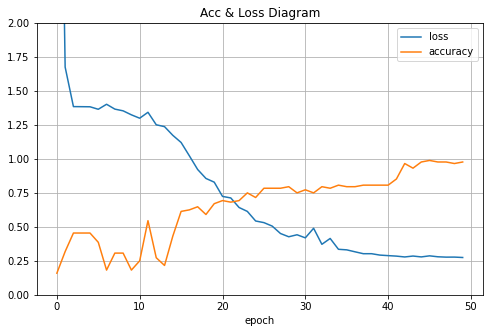

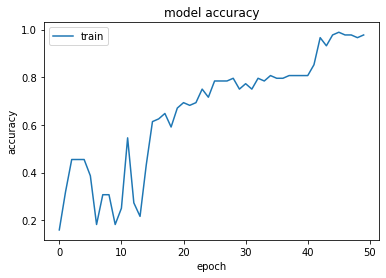

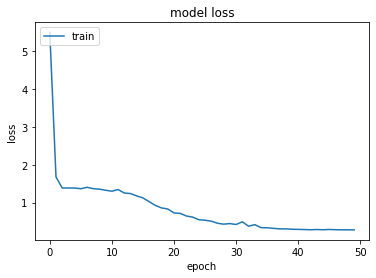

In [39]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize = (8,5))
plt.grid(True)
plt.title('Acc & Loss Diagram')
plt.xlabel('epoch')
plt.gca().set_ylim(0,2)
plt.show()

plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()


 Emotion is:  ['Gian']


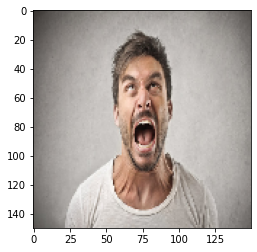

In [33]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array 
import numpy as np
import array


from keras.models import load_model
model_moneydetect = load_model('CNN_EmotionFaceDetect.h5')
# Load and define image - to test
img = load_img('angry_test.jpg', target_size=(150,150))
plt.imshow(img)

img=image.img_to_array(img) 

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

guess = np.argmax(model_moneydetect.predict(img),axis=1)
print(' Emotion is: ' , dataset_labels[guess])


 Emotion is:  ['Hanh Phuc']


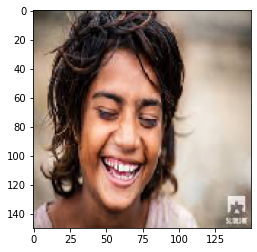

In [36]:
# Load and define image - to test
img = load_img('happy_testt.jpg', target_size=(150,150))
plt.imshow(img)

img=image.img_to_array(img) 

img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

guess = np.argmax(model_moneydetect.predict(img),axis=1)
print(' Emotion is: ' , dataset_labels[guess])